In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_sacks_salary_17-18')

In [3]:
qbs.dtypes

NAME           object
SACKS           int64
SACKS_rank    float64
salary          int64
dtype: object

In [4]:
qbs.head()

,NAME,SACKS,SACKS_rank,salary
0,Patrick Mahomes,2,3.0,4106447
1,Landry Jones,3,5.5,2200000
2,Geno Smith,3,5.5,1200000
3,Nick Foles,5,9.5,5500000
4,Sam Bradford,5,9.5,18000000


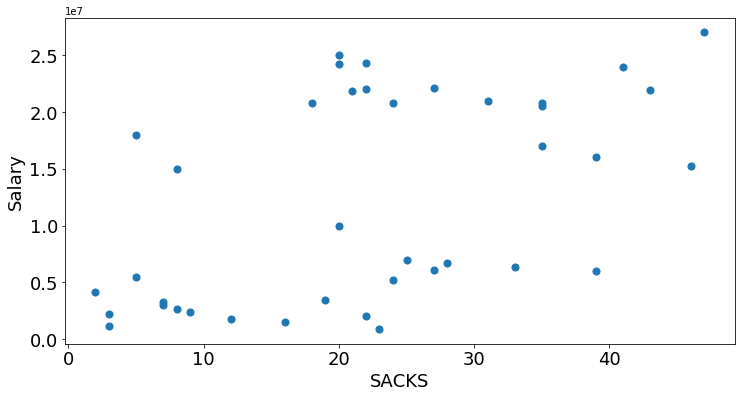

In [5]:
ax = qbs.plot(kind="scatter", x = 'SACKS',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('SACKS', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['SACKS', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 1.36642834e-16, -5.12410627e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 1.32273063,  0.91024799],
       [-1.19308551, -1.06967507],
       [ 0.28907358, -0.7768657 ],
       [-0.04598898,  1.16536215],
       [-1.24827229,  0.47513933]])

In [11]:
km.predict(X)

array([1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2,
       3, 2, 2, 3, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,SACKS,SACKS_rank,salary,clusters
0,Patrick Mahomes,2,3.0,4106447,1
1,Landry Jones,3,5.5,2200000,1
2,Geno Smith,3,5.5,1200000,1
3,Nick Foles,5,9.5,5500000,1
4,Sam Bradford,5,9.5,18000000,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[3.91111111e+01, 2.03726222e+07],
       [7.20000000e+00, 2.75060110e+06],
       [2.60000000e+01, 5.35670890e+06],
       [2.17500000e+01, 2.26432291e+07],
       [6.50000000e+00, 1.65000000e+07]])

In [14]:
qbs.groupby('clusters')[['SACKS', 'salary']].mean()

,SACKS,salary
clusters,,
0,39.111111,2.037262e+07
1,7.200000,2.750601e+06
2,26.000000,5.356709e+06
3,21.750000,2.264323e+07
4,6.500000,1.650000e+07


In [15]:
centroids = qbs.groupby('clusters')[['SACKS', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

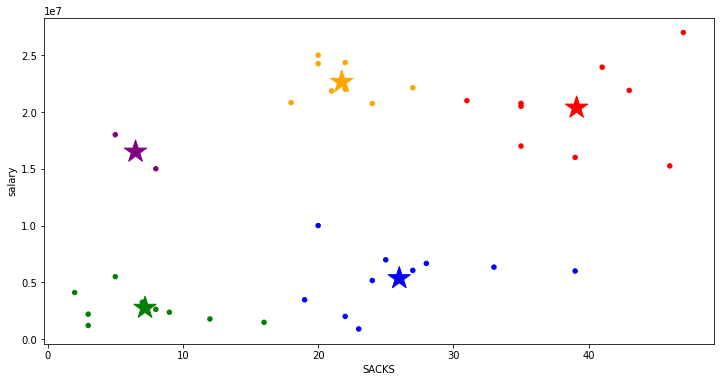

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'SACKS', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'SACKS', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

7.799720275254233

In [18]:
silhouette_score(X, km.labels_)

0.5682657407247009